In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
from datetime import datetime
import statsmodels.api as sm
%matplotlib inline

In [55]:
df = pd.read_csv('MtWashingtonDailyTemp.csv', sep=',')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,Sunrise,Sunset
0,12/1/2014,3,36,20,65.1,700,1608
1,12/2/2014,1,22,12,34.7,702,1607
2,12/3/2014,8,32,20,53.0,703,1607
3,12/4/2014,-5,9,2,60.2,704,1607
4,12/5/2014,6,17,12,30.5,705,1607


In [56]:
df.describe()

,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,Sunrise,Sunset
count,1461.000000,1461.00000,1461.000000,1461.000000,1461.000000,1461.000000
mean,21.897331,35.64271,28.987680,36.189049,548.158111,1768.847365
std,20.761506,18.44996,19.452995,16.304277,111.930343,116.061264
min,-40.000000,-19.00000,-27.000000,4.300000,401.000000,1606.000000
25%,8.000000,22.00000,15.000000,23.400000,434.000000,1645.000000
50%,24.000000,38.00000,31.000000,34.700000,536.000000,1754.000000
75%,40.000000,52.00000,46.000000,47.500000,643.000000,1859.000000
max,60.000000,71.00000,64.000000,91.200000,721.000000,1933.000000


In [57]:
type(df)

pandas.core.frame.DataFrame

In [58]:
df.isnull().sum()

DATE            0
MinTemp         0
MaxTemp         0
AvgTemp         0
AvgWindSpeed    0
Sunrise         0
Sunset          0
dtype: int64

In [59]:
df.dtypes

DATE             object
MinTemp           int64
MaxTemp           int64
AvgTemp           int64
AvgWindSpeed    float64
Sunrise           int64
Sunset            int64
dtype: object

In [60]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [61]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,Sunrise,Sunset
0,2014-12-01,3,36,20,65.1,700,1608
1,2014-12-02,1,22,12,34.7,702,1607
2,2014-12-03,8,32,20,53.0,703,1607
3,2014-12-04,-5,9,2,60.2,704,1607
4,2014-12-05,6,17,12,30.5,705,1607


In [62]:
df.dtypes

DATE            datetime64[ns]
MinTemp                  int64
MaxTemp                  int64
AvgTemp                  int64
AvgWindSpeed           float64
Sunrise                  int64
Sunset                   int64
dtype: object

In [63]:
# Forecasting Average Temperature

In [64]:
df_AvgTemp = df[['DATE','AvgTemp']]
df_AvgTemp

,DATE,AvgTemp
0,2014-12-01,20
1,2014-12-02,12
2,2014-12-03,20
3,2014-12-04,2
4,2014-12-05,12
...,...,...
1456,2018-11-26,20
1457,2018-11-27,15
1458,2018-11-28,14
1459,2018-11-29,17


In [65]:
df_AvgTemp = df_AvgTemp.set_index('DATE')
df_AvgTemp.head()

,AvgTemp
DATE,
2014-12-01,20
2014-12-02,12
2014-12-03,20
2014-12-04,2
2014-12-05,12


In [66]:
'''
df_AvgTemp['Ticks'] = range(0,len(df_AvgTemp.index.values))
df_AvgTemp
'''

"\ndf_AvgTemp['Ticks'] = range(0,len(df_AvgTemp.index.values))\ndf_AvgTemp\n"

In [67]:
'''
#simple line plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AvgTemp', data = df_AvgTemp);
'''

"\n#simple line plotting\nfig = plt.figure(1)\nax1 = fig.add_subplot(111)\nax1.set_xlabel('Ticks')\nax1.set_ylabel('Avg. Temp.')\nax1.set_title('Original Plot')\nax1.plot('Ticks', 'AvgTemp', data = df_AvgTemp);\n"

In [68]:
from pylab import rcParams as rc
rc['figure.figsize']= 15, 6

In [69]:
### Plotting the original Average temperature plot

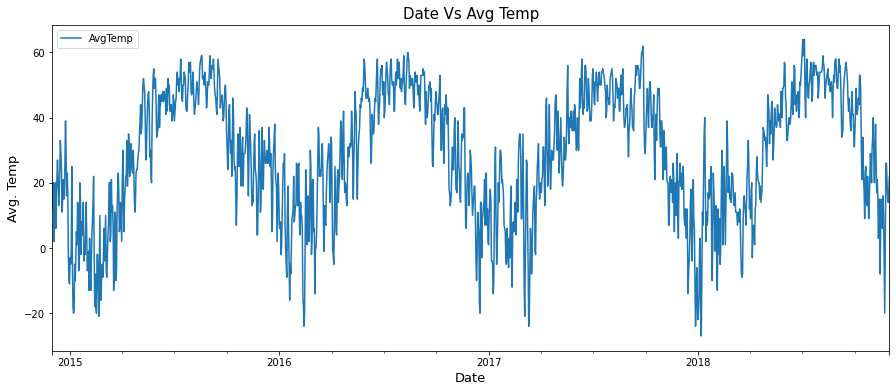

In [70]:
df_AvgTemp.plot()
plt.ylabel("Avg. Temp",fontsize=13)
plt.xlabel("Date",fontsize=13)
plt.title("Date Vs Avg Temp",fontsize=15)
plt.show()

We can see a similar trend in the average temperature across every year. The mean temperature is low during the end of 
the previous year and start of the new year which is the winter season and its higher during the 2nd and 3rd quarter of 
the year which are typically summer months.
The time series has a seasonality trend.

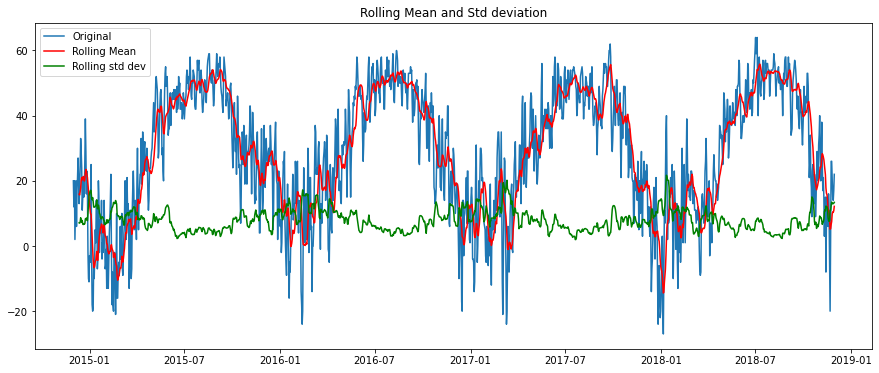

In [106]:
from statsmodels.tsa.stattools import adfuller
# Determing rolling statistics
roll_mean = df_AvgTemp.rolling(window=12).mean()
roll_std = df_AvgTemp.rolling(window=12).std()
# Plot rolling statistics
plt.plot(df_AvgTemp,label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='green', label = 'Rolling std dev')
plt.legend(loc='best')
plt.title('Rolling Mean and Std deviation')
plt.show(block=False)

In [71]:
#Checking if p-value is less than 0.05
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_AvgTemp.dropna(), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print(f'n_lags: {result[1]}')
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.255005
n_lags: 0.18689059009934794
p-value: 0.186891
Critial Values:
   1%, -3.4348961395618476
Critial Values:
   5%, -2.863547812296987
Critial Values:
   10%, -2.5678389447194556


The p-value is obtained is greater than significance level of 0.05 hence we don't reject the null hypothesis. The variance is constant which indicates that TS is stationary. The test Statistic is greater than critical values which means notstationary. The mean is not constant (no stationary).

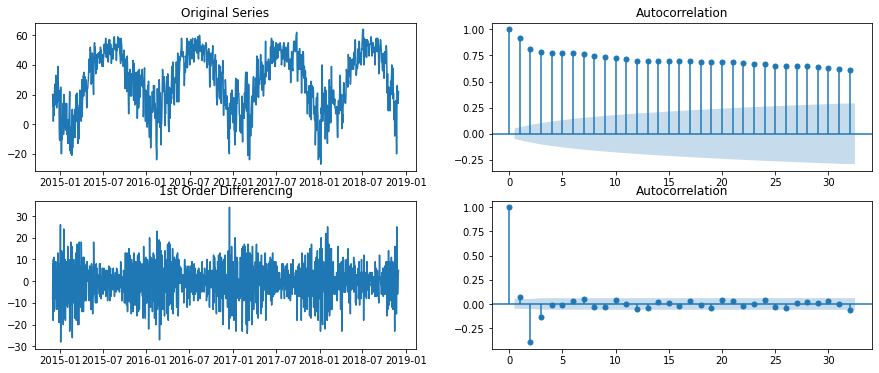

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df_AvgTemp.AvgTemp); axes[0, 0].set_title('Original Series')
plot_acf(df_AvgTemp.AvgTemp, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_AvgTemp.AvgTemp.diff()); axes[1, 0].set_title('1st Order Differencing')
ts_movingavg_diff = df_AvgTemp.AvgTemp.diff()
ts_movingavg_diff.dropna(inplace = True)
plot_acf(ts_movingavg_diff, ax=axes[1, 1])

plt.show()

In [113]:
result = adfuller(ts_movingavg_diff)
print('ADF Statistic: %f' % result[0])
print(f'n_lags: {result[1]}')
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -12.931121
n_lags: 3.698794307640734e-24
p-value: 0.000000
Critial Values:
   1%, -3.4348961395618476
Critial Values:
   5%, -2.863547812296987
Critial Values:
   10%, -2.5678389447194556


The p-value is obtained is lower than significance level of 0.05 hence we reject the null hypothesis. The variance is constant which indicates that TS is stationary. Also, test Statistic is less than critical values which means stationary. The mean is now constant.

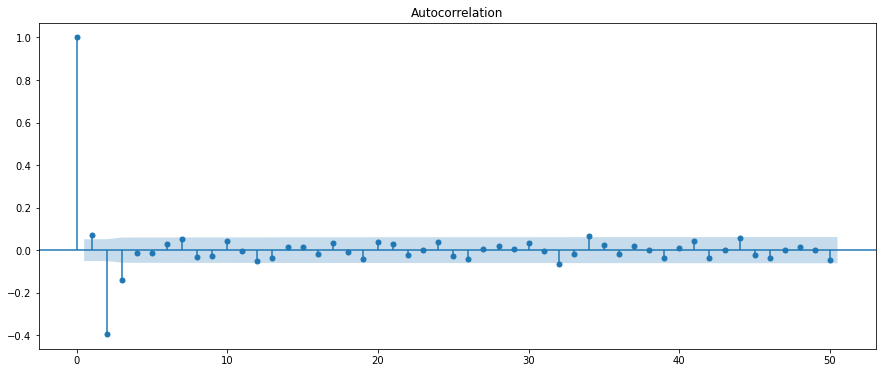

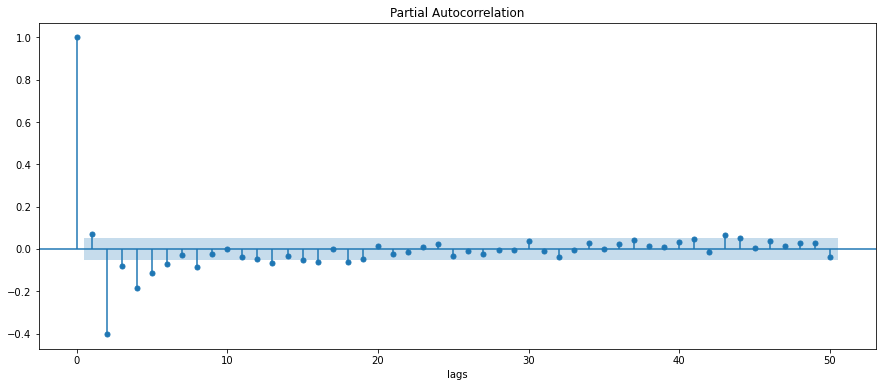

In [131]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(ts_movingavg_diff, lags=50)
plot_pacf(ts_movingavg_diff, lags=50)
plt.xlabel('lags')
plt.show()

In [117]:
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df_AvgTemp.AvgTemp,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


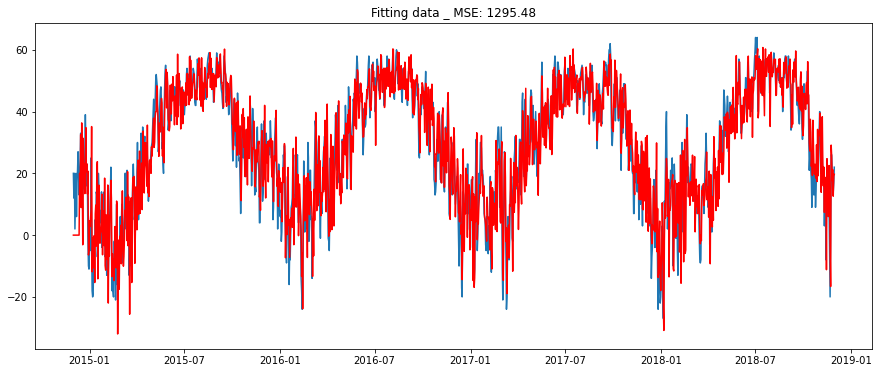

In [147]:
model = sm.tsa.statespace.SARIMAX(df_AvgTemp.AvgTemp, order=(1,0,1), seasonal_order= (1,1,0,12))  
results_MA = model.fit()  
plt.plot(df_AvgTemp.AvgTemp)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-ts_movingavg_diff)**2).mean()))
plt.show()

In [148]:
print(results_MA.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5156      0.024     21.390      0.000       0.468       0.563
ma.L1          0.5229      0.025     21.199      0.000       0.475       0.571
ar.S.L12      -0.5171      0.021    -25.137      0.000      -0.557      -0.477
sigma2        72.9225      2.450     29.768      0.000      68.121      77.724


C:\Users\15084\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


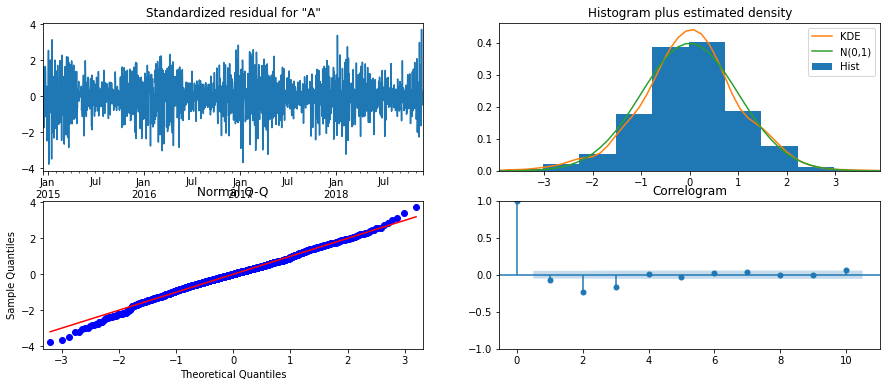

In [134]:
results_MA.plot_diagnostics()
plt.show()

In [149]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(df_AvgTemp.AvgTemp, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                              ARMA Model Results                              
Dep. Variable:                AvgTemp   No. Observations:                 1461
Model:                     ARMA(1, 1)   Log Likelihood               -5053.945
Method:                       css-mle   S.D. of innovations              7.688
Date:                Tue, 30 Aug 2022   AIC                          10115.890
Time:                        17:34:24   BIC                          10137.037
Sample:                    12-01-2014   HQIC                         10123.778
                         - 11-30-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.9474      1.848     15.661      0.000      25.325      32.570
ar.L1.AvgTemp     0.8529      0.015     55.162      0.000       0.823       0.883
ma.L1.AvgTemp     0.3571      0.035     

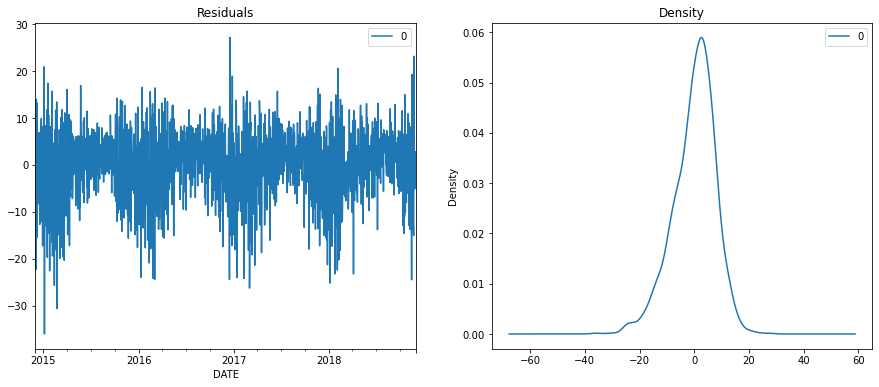

In [150]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


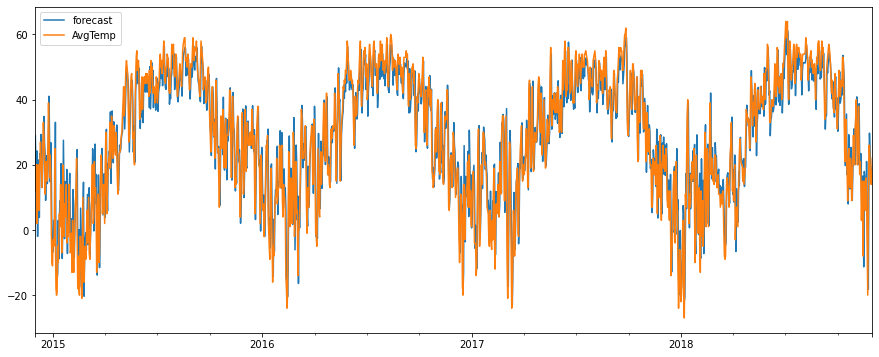

In [151]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [152]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_AvgTemp.AvgTemp[:1250]
test = df_AvgTemp.AvgTemp[1250:]

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

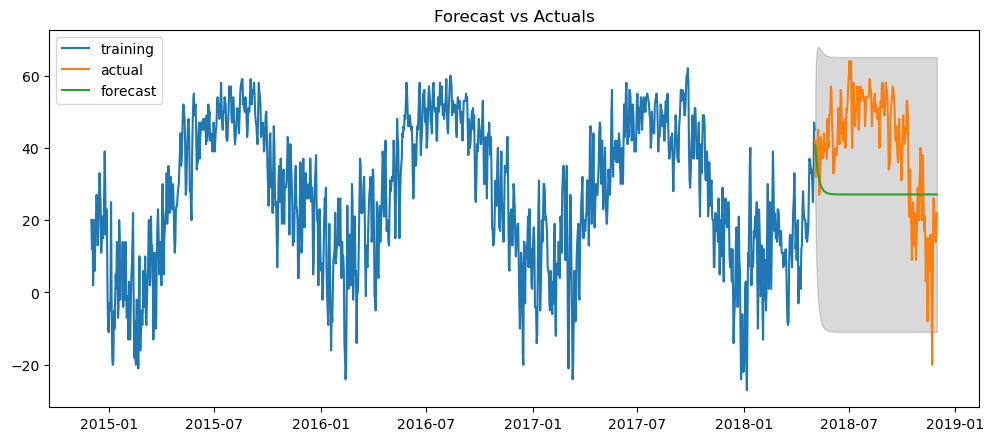

In [153]:
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(211, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [154]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.5679172200086188,
 'me': -12.95050875897525,
 'mae': 17.878195823270477,
 'mpe': -0.18187280041514592,
 'rmse': 20.08953270823525,
 'acf1': 0.9025864730228299,
 'corr': -0.03661435934813437,
 'minmax': 0.40292602897200425}

In [33]:
#LSTM 

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [93]:
# fix random seed for reproducibility
np.random.seed(7)

In [94]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_AvgTemp_lstm = scaler.fit_transform(df_AvgTemp)

In [95]:
train_size = int(len(df_AvgTemp_lstm) * 0.7)
test_size = len(df_AvgTemp_lstm) - train_size
train, test = df_AvgTemp_lstm[0:train_size,:], df_AvgTemp_lstm[train_size:len(df_AvgTemp_lstm),:]
print(len(train), len(test))

1022 439


In [96]:
def create_dataset(df_AvgTemp_lstm, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df_AvgTemp_lstm)-look_back-1):
        a = df_AvgTemp_lstm[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df_AvgTemp_lstm[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [97]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [98]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [99]:
# create and fit the LSTM network

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(20):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

1020/1020 - 12s - loss: 0.0238 - 12s/epoch - 11ms/step
1020/1020 - 5s - loss: 0.0140 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0120 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0104 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0091 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0080 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0072 - 5s/epoch - 5ms/step
1020/1020 - 6s - loss: 0.0068 - 6s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0067 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0066 - 5s/epoch - 5ms/step
1020/1020 - 6s - loss: 0.0065 - 6s/epoch - 6ms/step
1020/1020 - 6s - loss: 0.0065 - 6s/epoch - 6ms/step
1020/1020 - 6s - loss: 0.0065 - 6s/epoch - 6ms/step
1020/1020 - 6s - loss: 0.0065 - 6s/epoch - 6ms/step
1020/1020

In [100]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [101]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [102]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.03 RMSE
Test Score: 11.47 RMSE


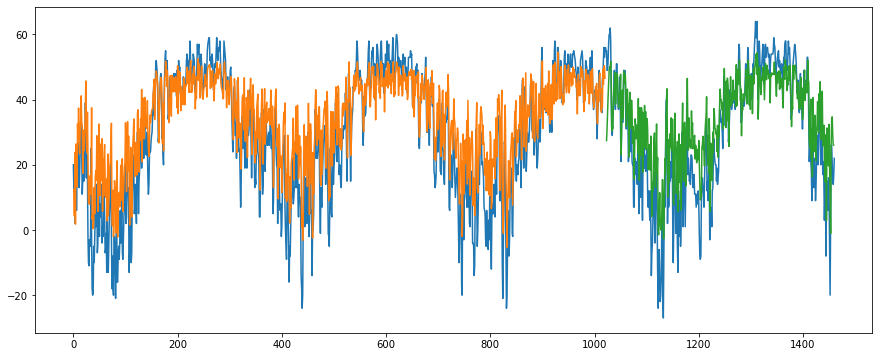

In [103]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_AvgTemp_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_AvgTemp_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_AvgTemp_lstm)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_AvgTemp_lstm))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
# Forecasting Average Wnd Speed

In [47]:
df_AvgWindSpeed = df[['DATE','AvgWindSpeed']]
df_AvgWindSpeed

,DATE,AvgWindSpeed
0,2014-12-01,65.1
1,2014-12-02,34.7
2,2014-12-03,53.0
3,2014-12-04,60.2
4,2014-12-05,30.5
...,...,...
1456,2018-11-26,26.6
1457,2018-11-27,43.0
1458,2018-11-28,29.4
1459,2018-11-29,40.5


In [48]:
df_AvgWindSpeed = df_AvgWindSpeed.set_index('DATE')
df_AvgWindSpeed.head()

,AvgWindSpeed
DATE,
2014-12-01,65.1
2014-12-02,34.7
2014-12-03,53.0
2014-12-04,60.2
2014-12-05,30.5


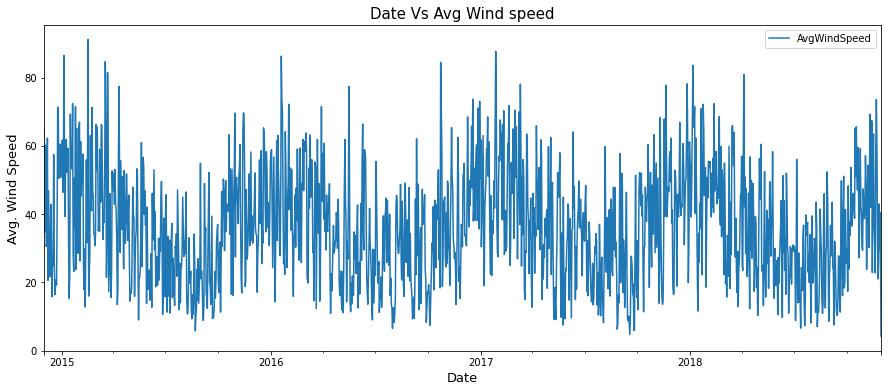

In [49]:
df_AvgWindSpeed.plot()
plt.ylabel("Avg. Wind Speed",fontsize=13)
plt.xlabel("Date",fontsize=13)
plt.title("Date Vs Avg Wind speed",fontsize=15)
plt.show()

In [41]:
#Checking if p-value is less than 0.05
res = adfuller(df_AvgWindSpeed.dropna())
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.342349
p-value: 0.000375


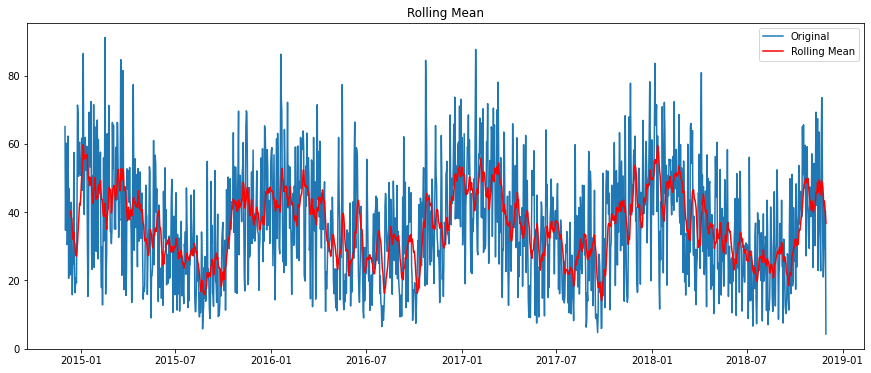

In [42]:
# Determing rolling statistics
roll_mean = df_AvgWindSpeed.rolling(window=12).mean()
# Plot rolling statistics
plt.plot(df_AvgWindSpeed,label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

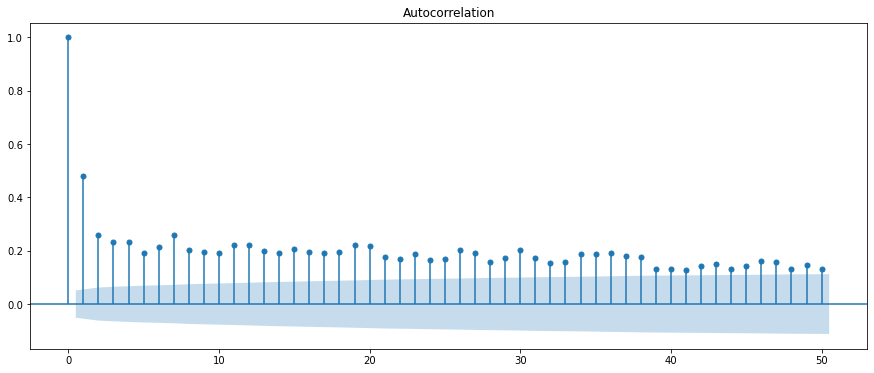

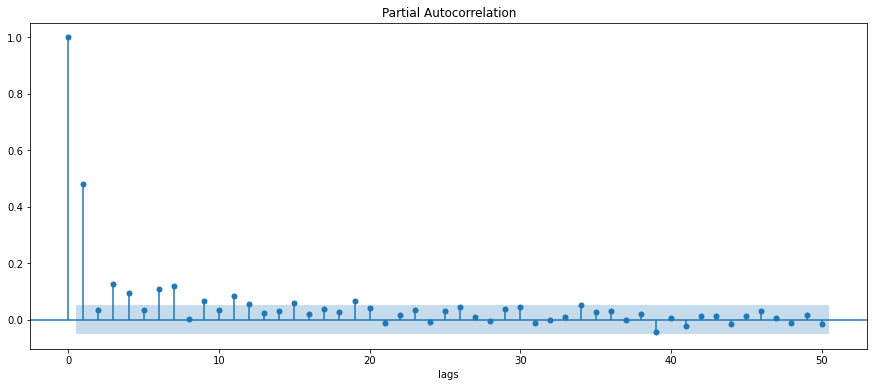

In [43]:
plot_acf(df_AvgWindSpeed.AvgWindSpeed, lags=50)
plot_pacf(df_AvgWindSpeed.AvgWindSpeed, lags=50)
plt.xlabel('lags')
plt.show()

In [44]:
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df_AvgWindSpeed.AvgWindSpeed,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


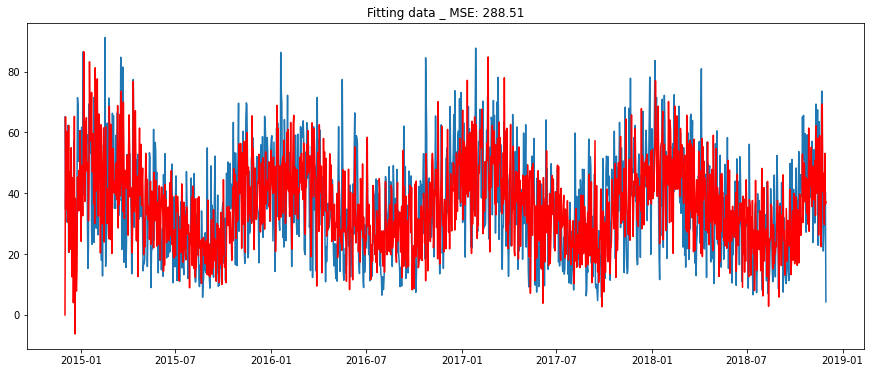

In [45]:
model2 = sm.tsa.statespace.SARIMAX(df_AvgWindSpeed.AvgWindSpeed, order=(1,1,2), seasonal_order= (1,1,0,12))  
res_MA = model2.fit()  
plt.plot(df_AvgWindSpeed.AvgWindSpeed)
plt.plot(res_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((res_MA.fittedvalues-df_AvgWindSpeed.AvgWindSpeed)**2).mean()))
plt.show()

In [46]:
print(res_MA.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2274      0.070      3.266      0.001       0.091       0.364
ma.L1         -0.8464      0.426     -1.988      0.047      -1.681      -0.012
ma.L2         -0.1536      0.090     -1.703      0.089      -0.330       0.023
ar.S.L12      -0.4738      0.024    -19.670      0.000      -0.521      -0.427
sigma2       280.9433    117.557      2.390      0.017      50.537     511.350


C:\Users\15084\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


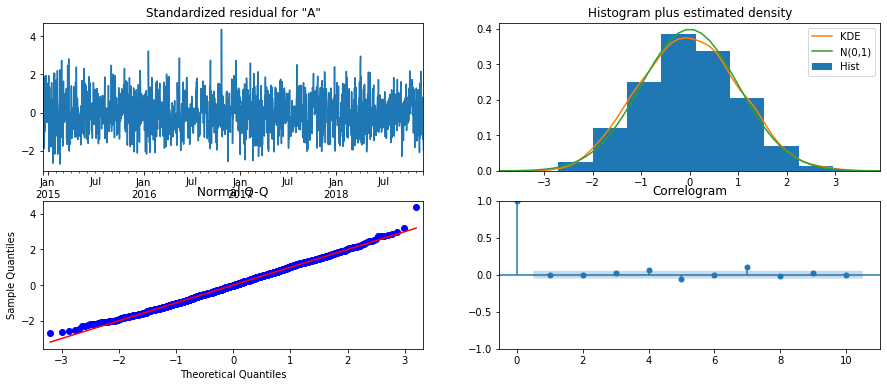

In [47]:
res_MA.plot_diagnostics()
plt.show()

In [48]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model2 = ARIMA(df_AvgWindSpeed.AvgWindSpeed, order=(1,1,2))
model_fit = model2.fit(disp=0)
print(model_fit.summary())

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                             ARIMA Model Results                              
Dep. Variable:         D.AvgWindSpeed   No. Observations:                 1460
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5908.731
Method:                       css-mle   S.D. of innovations             13.840
Date:                Fri, 17 Jun 2022   AIC                          11827.462
Time:                        13:06:15   BIC                          11853.893
Sample:                    12-02-2014   HQIC                         11837.322
                         - 11-30-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0022      0.029     -0.076      0.939      -0.058       0.054
ar.L1.D.AvgWindSpeed     0.1229      0.077      1.594      0.111      -0.028       0.274
ma.L1.D.AvgW

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


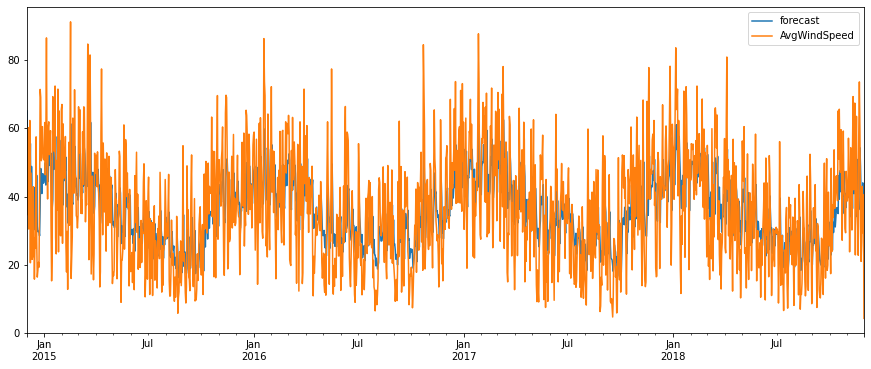

In [49]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [51]:
from statsmodels.tsa.stattools import acf
# Create Training and Testing 
train = df_AvgWindSpeed.AvgWindSpeed[:1250]
test = df_AvgWindSpeed.AvgWindSpeed[1250:]

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

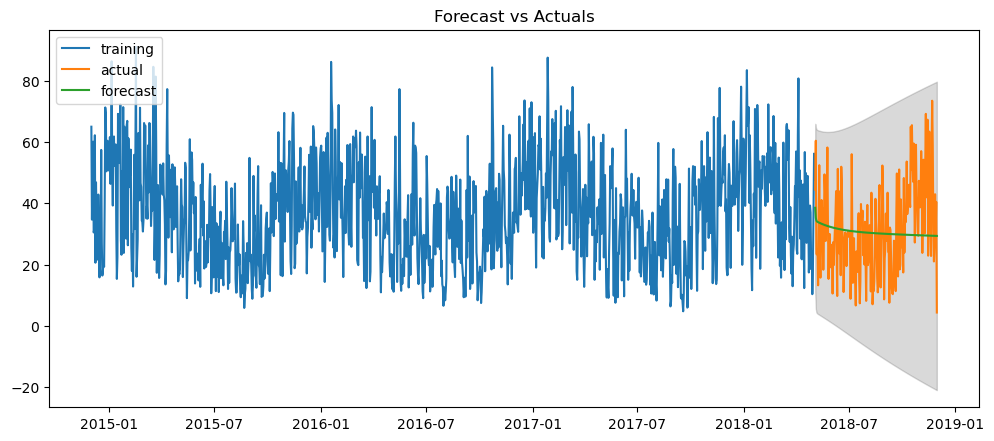

In [52]:
model = ARIMA(train, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(211, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [53]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\15084\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.533027903855327,
 'me': -1.0137875577884867,
 'mae': 11.691398886883153,
 'mpe': 0.2758422116949282,
 'rmse': 14.623686356683613,
 'acf1': 0.4265458818480503,
 'corr': -0.12412378877599567,
 'minmax': 0.3015458526664915}

In [54]:
# LSTM

In [69]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_AvgWindSp_lstm = scaler.fit_transform(df_AvgWindSpeed)

In [70]:
train_size = int(len(df_AvgWindSp_lstm) * 0.7)
test_size = len(df_AvgWindSp_lstm) - train_size
train, test = df_AvgWindSp_lstm[0:train_size,:], df_AvgWindSp_lstm[train_size:len(df_AvgWindSp_lstm),:]
print(len(train), len(test))

1022 439


In [71]:
def create_dataset(df_AvgWindSp_lstm, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df_AvgWindSp_lstm)-look_back-1):
        a = df_AvgWindSp_lstm[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df_AvgWindSp_lstm[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [72]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [61]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [73]:
# create and fit the LSTM network

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(30):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

1020/1020 - 10s - loss: 0.0336 - 10s/epoch - 10ms/step
1020/1020 - 5s - loss: 0.0301 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0295 - 5s/epoch - 4ms/step
1020/1020 - 5s - loss: 0.0289 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0282 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0274 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0267 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0262 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0259 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0258 - 5s/epoch - 4ms/step
1020/1020 - 5s - loss: 0.0257 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0257 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0258 - 5s/epoch - 5ms/step
1020/1020 - 5s - loss: 0.0258 - 5s/epoch - 4ms/step
1020/1020 - 5s - loss: 0.0258 - 5s/epoch - 5ms/step
1020/1020 - 6s - loss: 0.0258 - 6s/epoch - 5ms/step
1020/1020 - 7s - loss: 0.0258 - 7s/epoch - 6ms/step
1020/1020 - 6s - loss: 0.0258 - 6s/epoch - 6ms/step
1020/1020 - 5s - loss: 0.0258 - 5s/epoch - 5ms/step
1020/1020

In [74]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [75]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [76]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.17 RMSE
Test Score: 15.24 RMSE


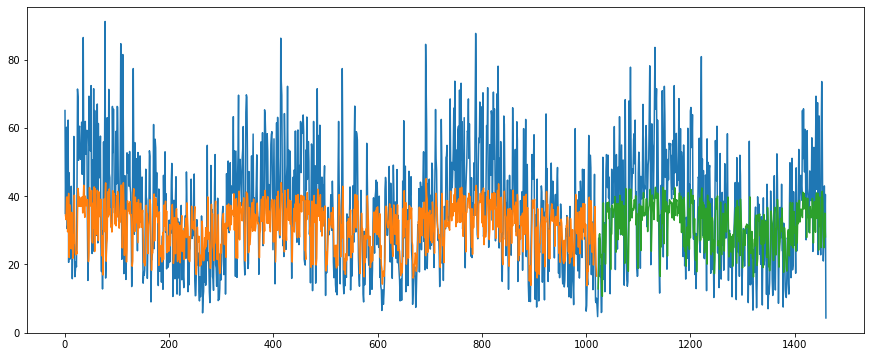

In [77]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_AvgWindSp_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_AvgWindSp_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_AvgWindSp_lstm)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_AvgWindSp_lstm))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()